In [1]:
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib
import matplotlib.pyplot as plt
import statsmodels.api as sm
import os
import warnings
warnings.filterwarnings("ignore")
plt.style.use('fivethirtyeight')

In [2]:
import matplotlib.pyplot as plt
import numpy as np
from statsmodels.tsa.seasonal import seasonal_decompose

## My Data had time date so i just used the month data to find the trends.

In [5]:
path = r'Desktop/CF/Achievement 6/Data Sets/NYPD_cleaned.pkl'

In [6]:
df = pd.read_pickle(os.path.join(path)) 

In [7]:
df.head()

,ARREST_KEY,Offense_Category,Offense_Description,ARREST_BORO,ARREST_PRECINCT,JURISDICTION_CODE,AGE_GROUP,PERP_SEX,PERP_RACE,Latitude,Longitude,Month,Year
0,236791704,Unknown,Unknown,M,28.0,0.0,45-64,M,BLACK,40.799009,-73.952409,11.0,2021.0
1,237354740,RAPE 3,RAPE,B,41.0,0.0,25-44,M,WHITE HISPANIC,40.816392,-73.895296,12.0,2021.0
2,236081433,"CHILD, ENDANGERING WELFARE",SEX CRIMES,Q,113.0,0.0,25-44,M,BLACK,40.679700,-73.776047,11.0,2021.0
4,192799737,SEXUAL ABUSE,SEX CRIMES,M,25.0,0.0,45-64,M,BLACK,40.800694,-73.941109,1.0,2019.0
5,193260691,Unknown,Unknown,M,14.0,0.0,25-44,M,UNKNOWN,40.757839,-73.991212,2.0,2019.0


In [8]:
df['DATE'] = pd.to_datetime(df[['Year', 'Month']].assign(DAY=1))

### I created a month and arrest key count

In [10]:
df.head()

,ARREST_KEY,Offense_Category,Offense_Description,ARREST_BORO,ARREST_PRECINCT,JURISDICTION_CODE,AGE_GROUP,PERP_SEX,PERP_RACE,Latitude,Longitude,Month,Year,DATE
0,236791704,Unknown,Unknown,M,28.0,0.0,45-64,M,BLACK,40.799009,-73.952409,11.0,2021.0,2021-11-01
1,237354740,RAPE 3,RAPE,B,41.0,0.0,25-44,M,WHITE HISPANIC,40.816392,-73.895296,12.0,2021.0,2021-12-01
2,236081433,"CHILD, ENDANGERING WELFARE",SEX CRIMES,Q,113.0,0.0,25-44,M,BLACK,40.679700,-73.776047,11.0,2021.0,2021-11-01
4,192799737,SEXUAL ABUSE,SEX CRIMES,M,25.0,0.0,45-64,M,BLACK,40.800694,-73.941109,1.0,2019.0,2019-01-01
5,193260691,Unknown,Unknown,M,14.0,0.0,25-44,M,UNKNOWN,40.757839,-73.991212,2.0,2019.0,2019-02-01


In [11]:
df_sub= df.groupby(['DATE'])['ARREST_KEY'].count()

In [12]:
DF_sub = df_sub.reset_index()

In [13]:
DF_sub 

,DATE,ARREST_KEY
0,2006-01-01,31158
1,2006-02-01,28960
2,2006-03-01,34009
3,2006-04-01,30629
4,2006-05-01,32366
...,...,...
187,2021-08-01,13745
188,2021-09-01,13756
189,2021-10-01,14453
190,2021-11-01,13068


In [14]:
data_sub = DF_sub .loc[(DF_sub ['DATE'] >= '2018-01-01') & (DF_sub ['DATE'] < '2020-06-01')]

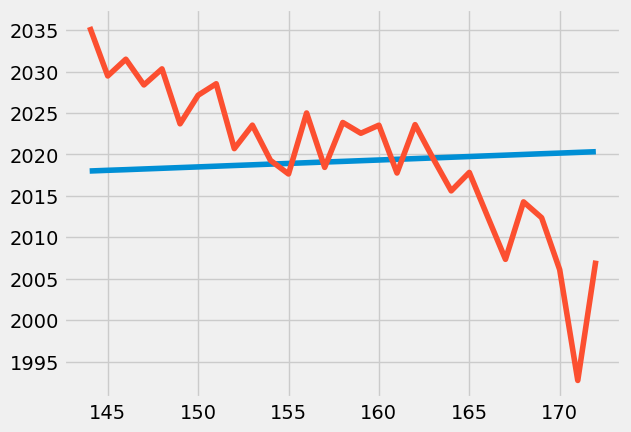

In [15]:
plt.plot(data_sub)

In [16]:
data_sub.sort_index(inplace=True)

In [17]:
data_sub

,DATE,ARREST_KEY
144,2018-01-01,23882
145,2018-02-01,21724
146,2018-03-01,22462
147,2018-04-01,21327
148,2018-05-01,22036
149,2018-06-01,19612
150,2018-07-01,20875
151,2018-08-01,21380
152,2018-09-01,18518
153,2018-10-01,19554


## changing date type to datestampe and removing the index

In [18]:
from datetime import datetime

data_sub['DATE'] = pd.to_datetime(data_sub['DATE']) # Create a datetime column from "Date.""
data_sub = data_sub.set_index('DATE') # Set the datetime as the index of the dataframe.
data_sub.head()

,ARREST_KEY
DATE,
2018-01-01,23882
2018-02-01,21724
2018-03-01,22462
2018-04-01,21327
2018-05-01,22036


### Plotting the data By looking at it I can tell its non Stationary

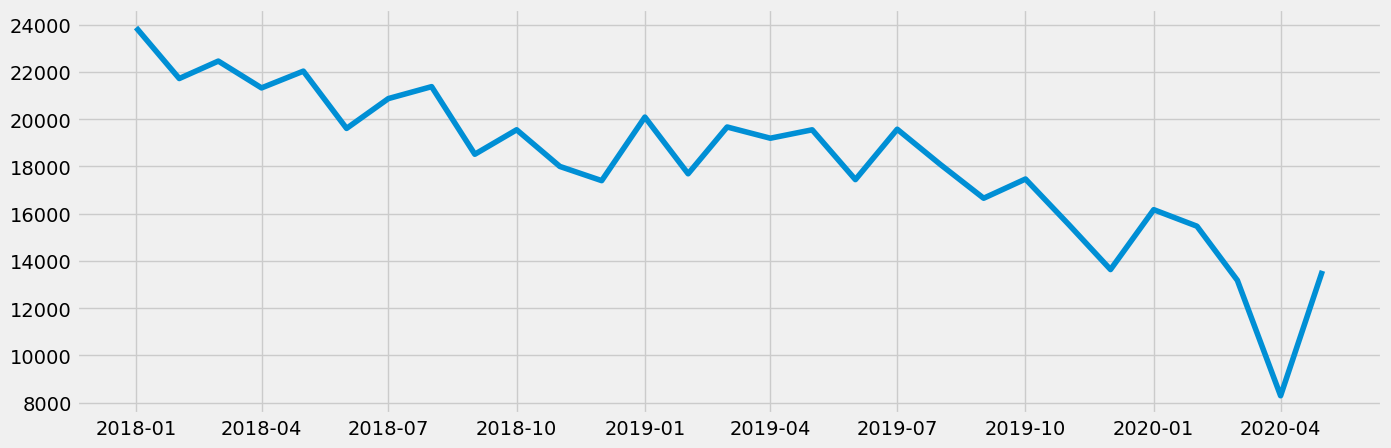

In [20]:
plt.figure(figsize=(15,5), dpi=100)
plt.plot(data_sub)

In [21]:
data_sub.head()

,ARREST_KEY
DATE,
2018-01-01,23882
2018-02-01,21724
2018-03-01,22462
2018-04-01,21327
2018-05-01,22036


In [23]:
data_sub = data_sub.reset_index()

In [24]:
data_sub['DATE']= data_sub['DATE'].astype(str)

In [27]:
from datetime import datetime

data_sub['DATE'] = pd.to_datetime(data_sub['DATE']) # Create a datetime column from "Date.""
data_sub = data_sub.set_index('DATE') # Set the datetime as the index of the dataframe.
data_sub.head()

,ARREST_KEY
DATE,
2018-01-01,23882
2018-02-01,21724
2018-03-01,22462
2018-04-01,21327
2018-05-01,22036


## Checking for trend and starting the time analysis by decomposition

In [28]:
decomposition = sm.tsa.seasonal_decompose(data_sub,period=3)

In [29]:
from pylab import rcParams # This will define a fixed size for all special charts.

rcParams['figure.figsize'] = 18, 7

## Upon obsewrving i do see a trend developing but the data is still non Stationary

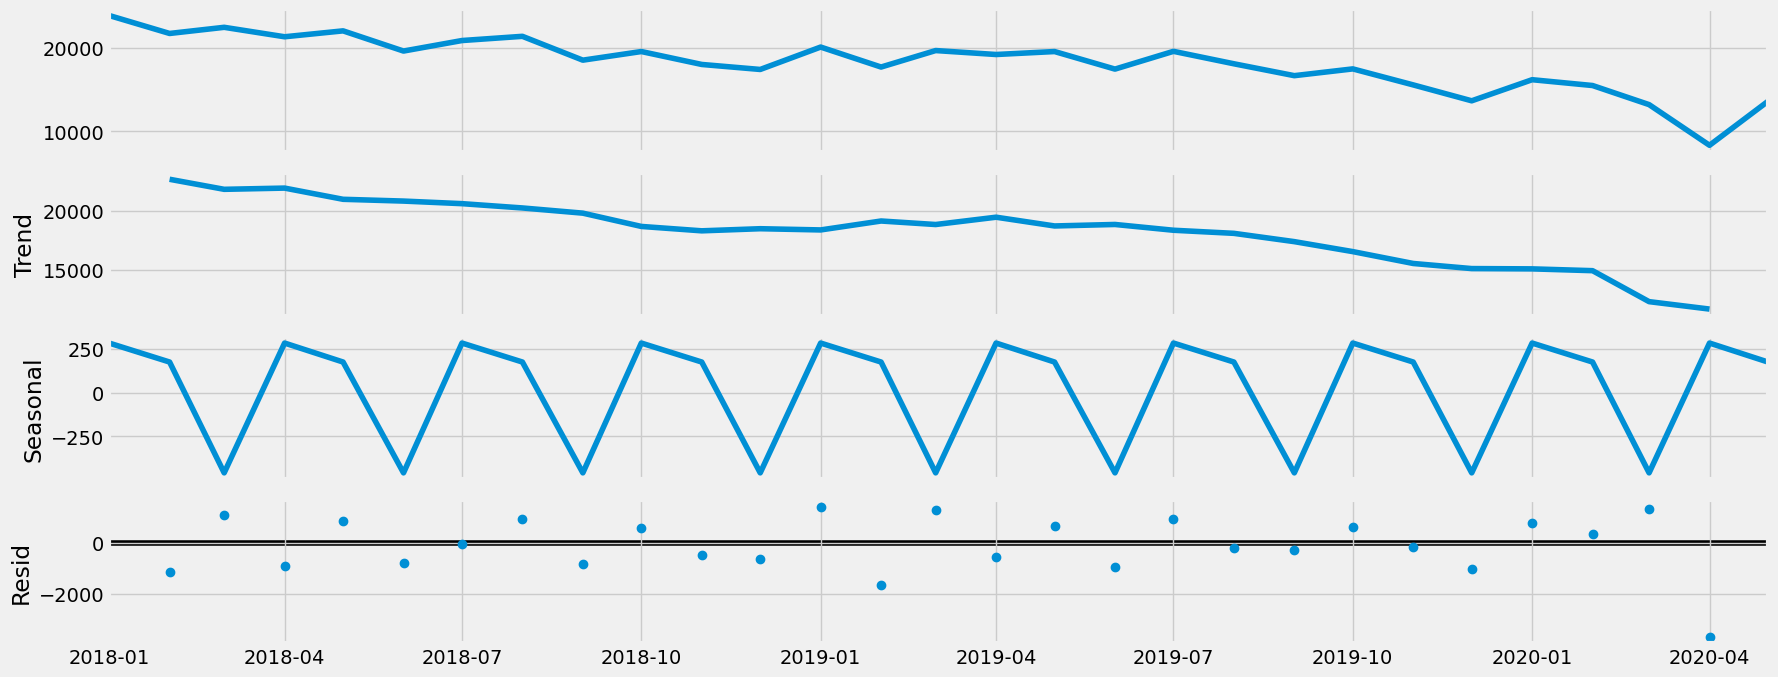

In [30]:
decomposition.plot()
plt.show()

In [31]:
from statsmodels.tsa.stattools import adfuller 

def dickey_fuller(timeseries): 
  
    print ('Dickey-Fuller Stationarity test:')
    test = adfuller(timeseries, autolag='AIC')
    result = pd.Series(test[0:4], index=['Test Statistic','p-value','Number of Lags Used','Number of Observations Used'])
    for key,value in test[4].items():
       result['Critical Value (%s)'%key] = value
    print (result)


dickey_fuller(data_sub)

Dickey-Fuller Stationarity test:
Test Statistic                  0.970725
p-value                         0.993947
Number of Lags Used             3.000000
Number of Observations Used    25.000000
Critical Value (1%)            -3.723863
Critical Value (5%)            -2.986489
Critical Value (10%)           -2.632800
dtype: float64


## The data concludes that the data is non stationary The test statistic is higher than the critical value

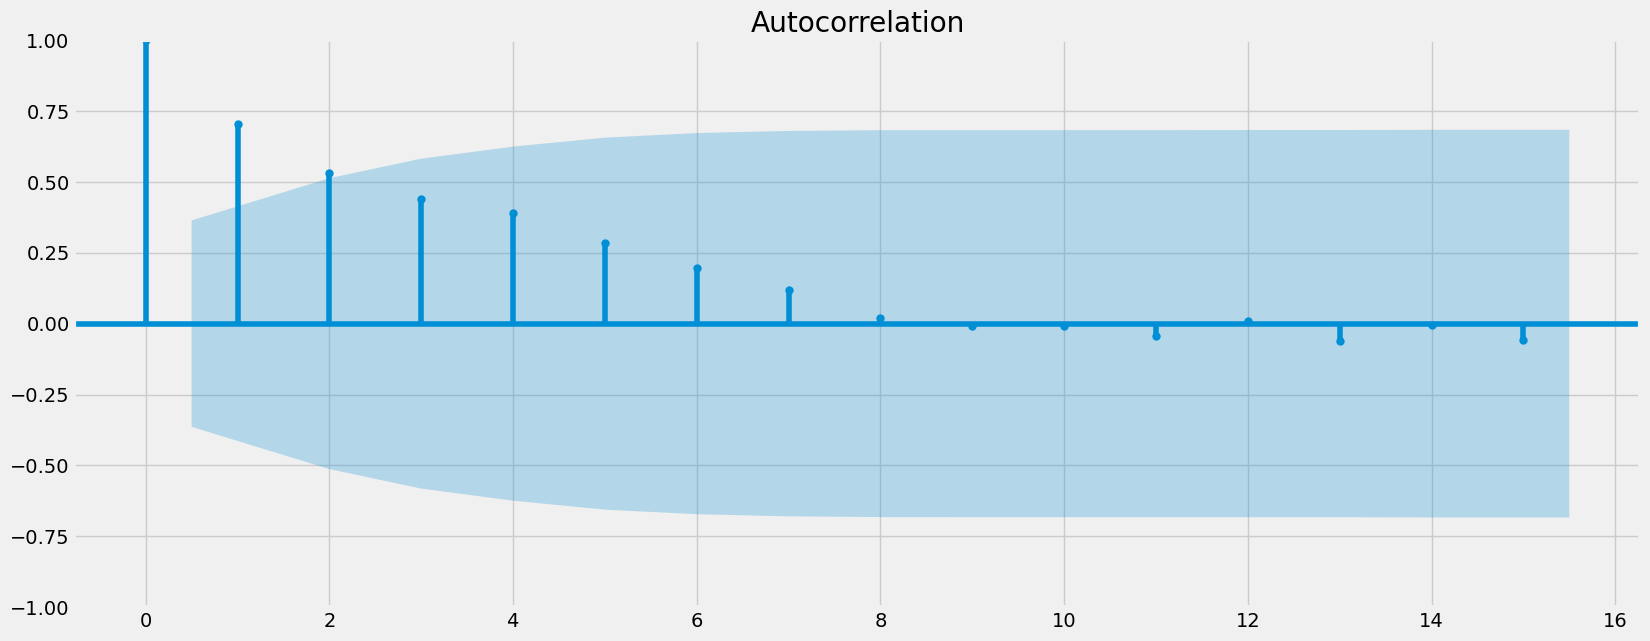

In [32]:
from statsmodels.graphics.tsaplots import plot_acf, plot_pacf # Here, you import the autocorrelation and partial correlation plots

plot_acf(data_sub)
plt.show()

## Differencing to make the data stationary

In [39]:
d_diff = data_sub - data_sub.shift(1) 

In [42]:
d_diff.dropna(inplace = True)

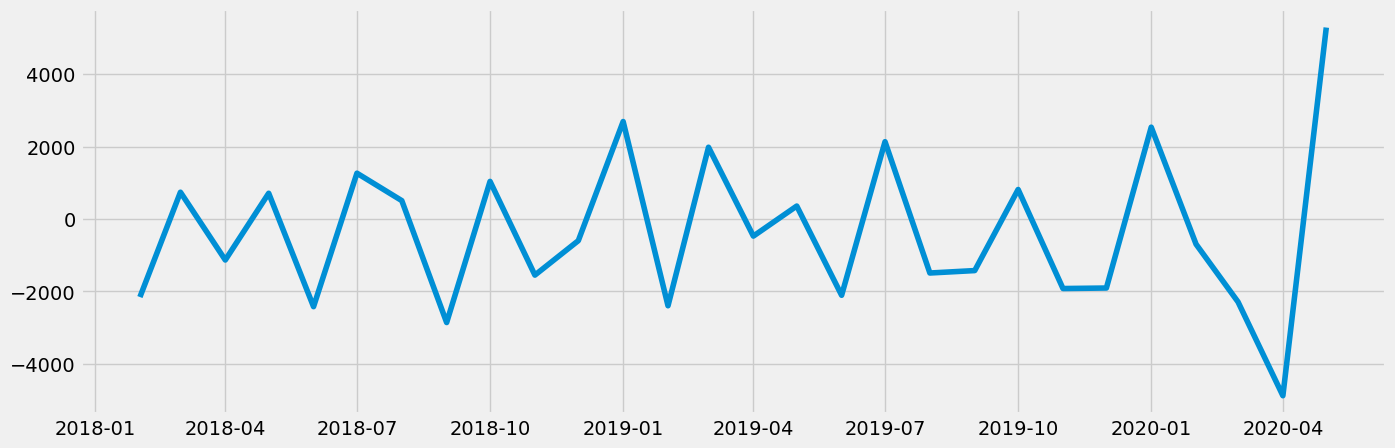

In [35]:
plt.figure(figsize=(15,5), dpi=100)
plt.plot(d_diff)

In [36]:
d_diff.head()

,ARREST_KEY
DATE,
2018-02-01,-2158.0
2018-03-01,738.0
2018-04-01,-1135.0
2018-05-01,709.0
2018-06-01,-2424.0


## I was able to after one round of differencing make the test statistic lower than the critical value in all percentages

In [37]:
dickey_fuller(d_diff)

Dickey-Fuller Stationarity test:
Test Statistic                -6.097698e+00
p-value                        1.000806e-07
Number of Lags Used            1.000000e+00
Number of Observations Used    2.600000e+01
Critical Value (1%)           -3.711212e+00
Critical Value (5%)           -2.981247e+00
Critical Value (10%)          -2.630095e+00
dtype: float64


In [43]:
d_diff

,ARREST_KEY
DATE,
2018-02-01,-2158.0
2018-03-01,738.0
2018-04-01,-1135.0
2018-05-01,709.0
2018-06-01,-2424.0
2018-07-01,1263.0
2018-08-01,505.0
2018-09-01,-2862.0
2018-10-01,1036.0


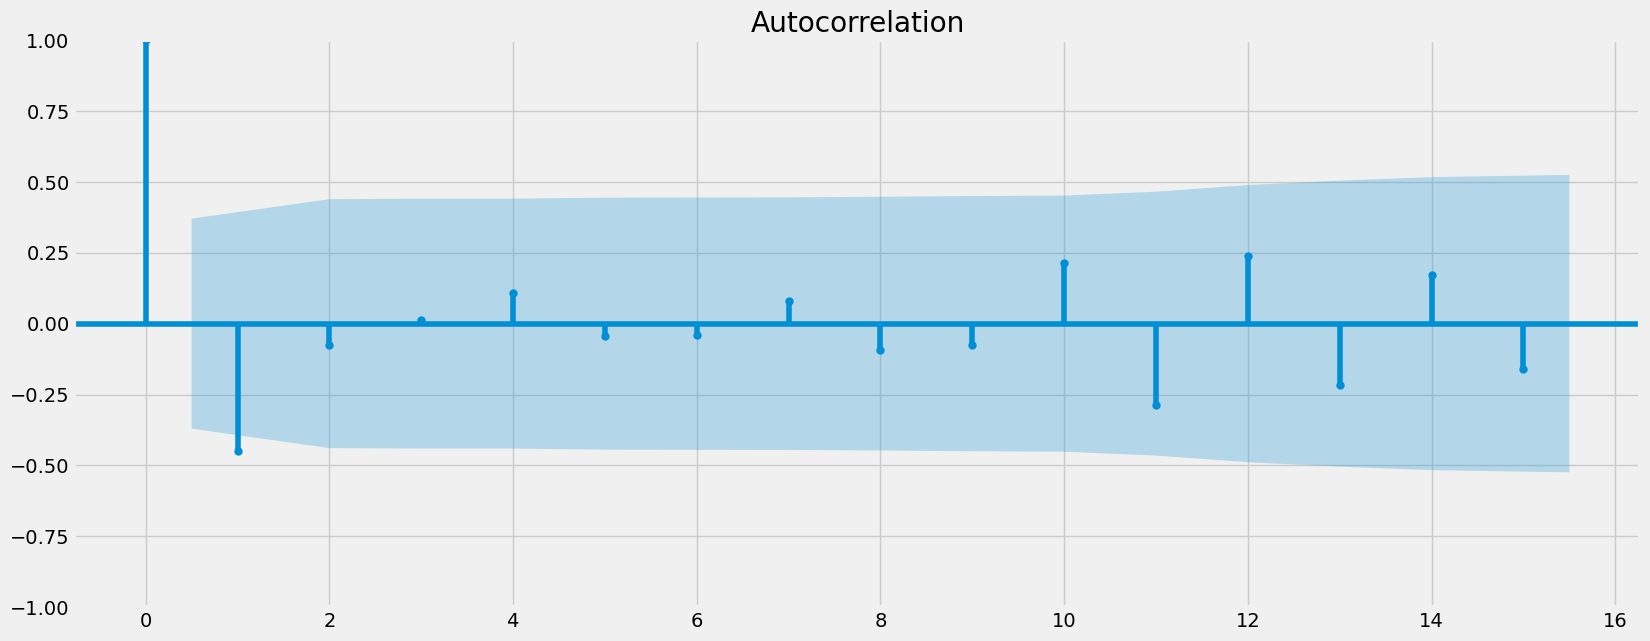

In [44]:
plot_acf(d_diff)
plt.show()

In [ ]:
## Whle i have succeeded in making my data statonary it is not a very strong stationary trend. 
## but to note is that Crime by month has other factors that go into the spike and downward trends
s